In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df= pd.read_csv(r"C:\Users\suman\Desktop\cetpa\codes\weatherAUS.csv")

In [3]:
df.head(8)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
# view dimensions of dataset
# We can see that there are 142193 instances and 23 variables in the data set.

df.shape

(145460, 23)

In [6]:
#names of columns
df.columns


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


 # Exploratory Data Analysis - EDA

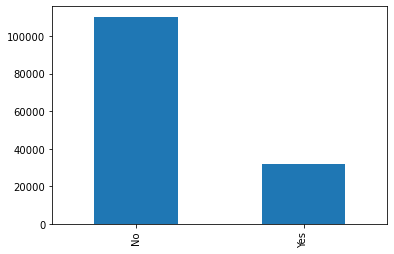

In [8]:
#1
df['RainTomorrow'].value_counts().plot(kind='bar')

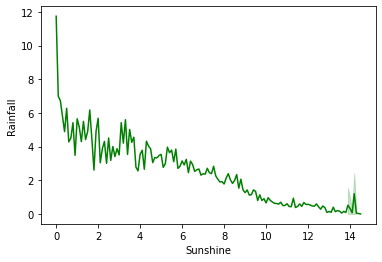

In [9]:
#2. Bi-variate Analysis:

#a) Sunshine vs Rainfall:

sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='green')

In [10]:
# Sunshine feature is inversely proportional to the Rainfall feature.

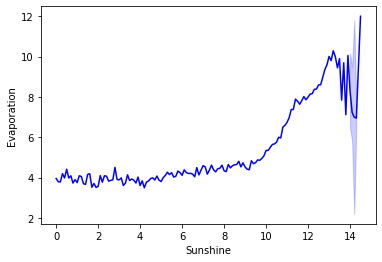

In [11]:
#b) Sunshine vs Evaporation:

sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='blue')

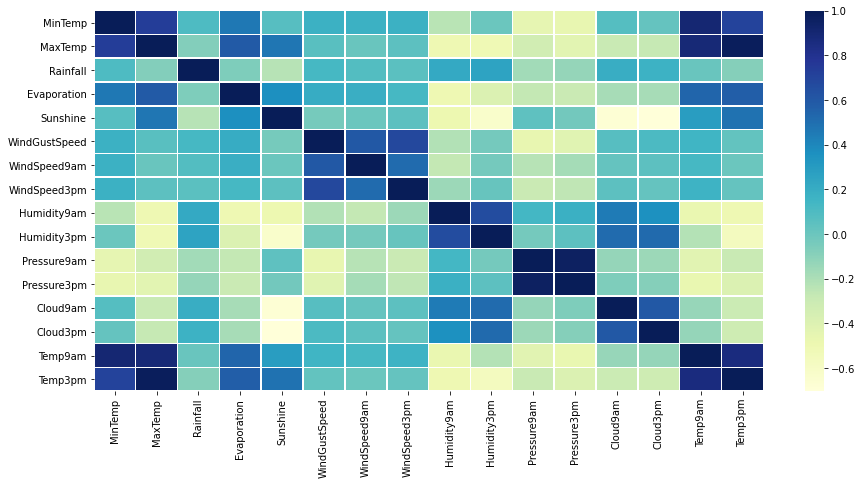

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = "YlGnBu")

In [13]:
#The following code gives the number of values per column.
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

#### Often it is a good idea to remove columns that contain large amounts of missing data since these tend to be less useful to constructing our model.
###### We can see that there are only 4 variables in the dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm and RainToday.
##### We see here that Sunshine, Evaporation, Cloud3pm, Cloud9am have less than 60% of data, so we will remove these from our dataset. We will also remove the Date column.

In [14]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Types of variables
#### In this section, I segregate the dataset into categorical and numerical variables.
#### There are a mixture of categorical and numerical variables in the dataset. 
#### Categorical variables have data type object. Numerical variables have data type float64.

##### find categorical variables.

In [16]:
# find categorical variables
#categorical data use label, name or other descriptors to identify exclusive category or types of things 
#numerical value represents frequency, measurement
categorical = [var for var in df.columns if df[var].dtype=='object']


In [17]:
# view the categorical variables

df[categorical].head()


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [18]:
# view the categorical variables

categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

# Summary of categorical variables
### There is a date variable. It is denoted by Date column.
### There are 6 other categorical variables. 
### These are ----> Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.
### There are two binary categorical variables - RainToday and RainTomorrow.
### RainTomorrow is the target variable.

_______________________________________________________________________________________________________________________________
# Problems within categorical variables
#### Explore the categorical variables.

### Missing values in categorical variables

In [19]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [20]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


###### We can see that there are only 4 categorical variables in the dataset which contains missing values.
###### These are ----->  WindGustDir, WindDir9am, WindDir3pm and RainToday.

_______________________________________________________________________________________________________________________________
# Frequency counts of categorical variables
### Check the frequency counts of categorical variables.
The accuracy, performance of a classifier not only depends on the model that we use, but also depends on how we preprocess data, and what kind of data you’re feeding to the classifier to learn.
Many Machine learning algorithms like Linear Regression, Logistic Regression, k-nearest neighbors, etc. can handle only numerical data, so encoding categorical data to numeric becomes a necessary step.  But before jumping into encoding, check the cardinality of each categorical feature.
Cardinality: The number of unique values in each categorical feature is known as cardinality.
A feature with a high number of distinct/ unique values is a high cardinality feature. A categorical feature with hundreds of zip codes is the best example of a high cardinality feature.
This high cardinality feature poses many serious problems like it will increase the number of dimensions of data when that feature is encoded. This is not good for the model.
There are many ways to handle high cardinality, one would be feature engineering and the other is simply dropping that feature if it doesn’t add any value to the model.
Let’s find the cardinality for Categorical features:


In [21]:
#The number of labels within a categorical variable is known as cardinality. 
#A high number of labels within a variable is known as high cardinality. 
#High cardinality may pose some serious problems in the machine learning model. 
#So, I will check for high cardinality.
#Cardinality is the number of unique sets of data in a database. 

for var in categorical: 
    
    print(df[var].value_counts())

2014-02-16    49
2015-05-09    49
2013-04-01    49
2015-04-22    49
2016-02-02    49
              ..
2008-01-10     1
2007-11-10     1
2007-11-12     1
2007-11-26     1
2007-12-21     1
Name: Date, Length: 3436, dtype: int64
Canberra            3436
Sydney              3344
Darwin              3193
Perth               3193
Hobart              3193
Adelaide            3193
Melbourne           3193
Brisbane            3193
Cairns              3040
MountGambier        3040
Bendigo             3040
GoldCoast           3040
AliceSprings        3040
Townsville          3040
Ballarat            3040
MountGinini         3040
Albury              3040
Launceston          3040
Wollongong          3040
Albany              3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
BadgerysCreek       3009
Williamtown         3009
PerthAirport        3009
Portland            3009
Nuriootpa           3009
MelbourneAirport    3009
Witchcliffe         3009
Woomera             3009

In [22]:
df.sample()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
23185,2014-11-26,NorfolkIsland,16.9,23.8,0.0,6.0,10.4,ENE,30.0,NE,...,63.0,61.0,1019.4,1018.5,1.0,3.0,21.8,23.0,No,No


In [23]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


##### Drop the original Date variable

In [24]:
#As date has a lot of labels 
#We can see that there is a Date variable which either needs to be preprocessed or delete
#All the other variables contain relatively smaller number of variables.
#for now I am going to delete this data


df.drop('Date', axis=1, inplace = True)

##### view the summary

In [25]:
#no date column is there
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

 # Explore the categorical variables one by one

In [26]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print("No. of categorical values data---> ",len(categorical))
categorical

No. of categorical values data--->  6


['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [27]:
# Number of data missing in categorical variable 
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

# Explore Location variable

In [28]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [29]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Perth               3193
Hobart              3193
Adelaide            3193
Melbourne           3193
Brisbane            3193
Cairns              3040
MountGambier        3040
Bendigo             3040
GoldCoast           3040
AliceSprings        3040
Townsville          3040
Ballarat            3040
MountGinini         3040
Albury              3040
Launceston          3040
Wollongong          3040
Albany              3040
Penrith             3039
Tuggeranong         3039
Newcastle           3039
BadgerysCreek       3009
Williamtown         3009
PerthAirport        3009
Portland            3009
Nuriootpa           3009
MelbourneAirport    3009
Witchcliffe         3009
Woomera             3009
Dartmoor            3009
SydneyAirport       3009
Watsonia            3009
Cobar               3009
WaggaWagga          3009
Richmond            3009
Sale                3009
Mildura             3009
Moree               3009


In [30]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Explore WindGustDir variable

In [31]:
# check labels in WindGustDir variable
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [32]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [33]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Explore WindDir9am variable

In [34]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [35]:
df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [36]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Explore WindDir3pm variable

In [37]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [38]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [39]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Explore RainToday variable

In [40]:
# check labels in RainToday variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [41]:
# check frequency distribution of values in RainTommorrow variable

df.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [42]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy = pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True)

In [43]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

dummy.sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

# Explore RainTommorrow variable

In [44]:
# check labels in RainTomorrow variable

df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [45]:
# check frequency distribution of values in RainTommorrow variable

df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [46]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

dummy_data = pd.get_dummies(df.RainTomorrow, drop_first=True, dummy_na=True)

In [47]:
dummy_data

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [48]:
dummy_data.sum(axis=0)

Yes    31877
NaN     3267
dtype: int64

# Explore Numerical Variables

In [49]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print(numerical,"\n\nNumber of numerical data---> ",len(numerical))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

Number of numerical data--->  16


In [50]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


 # Problems within numerical variables

### Missing values in numerical variables

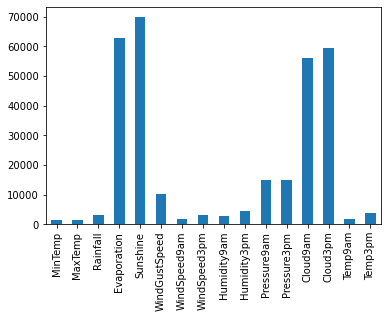

In [51]:
df[numerical].isnull().sum().plot(kind='bar')

In [52]:
# view summary statistics in numerical variables

df[numerical].describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


# Checking Outliers

Text(0, 0.5, 'WindSpeed3pm')

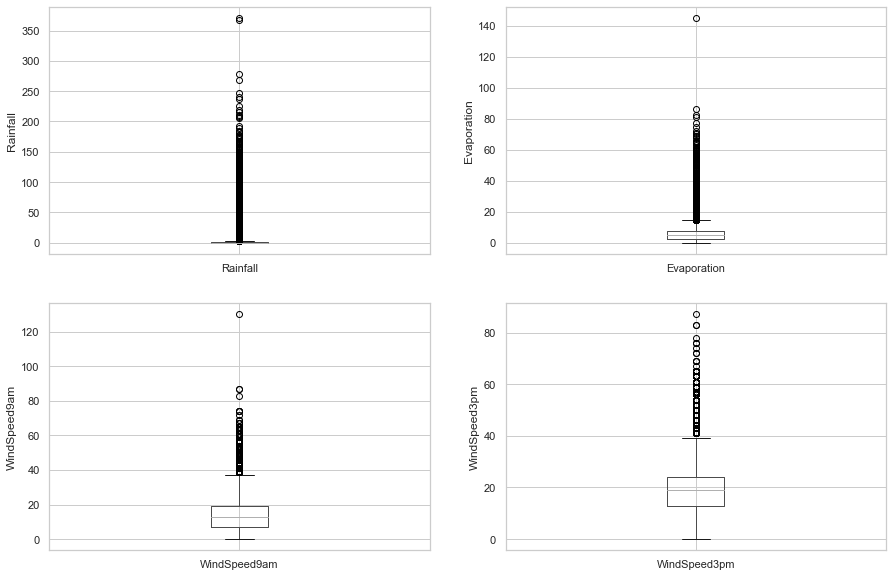

In [53]:
# draw boxplots to visualize outliers
# use to set style of background of plot
sns.set(style='whitegrid')

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_ylabel('WindSpeed3pm')

_______________________________________________________________________________________________________________________________
## Check the distribution of variables
#### plot the histograms to check distributions to find out if they are normal or skewed. 
#### If the variable follows normal distribution, then do Extreme Value Analysis otherwise 
#### if they are skewed,find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

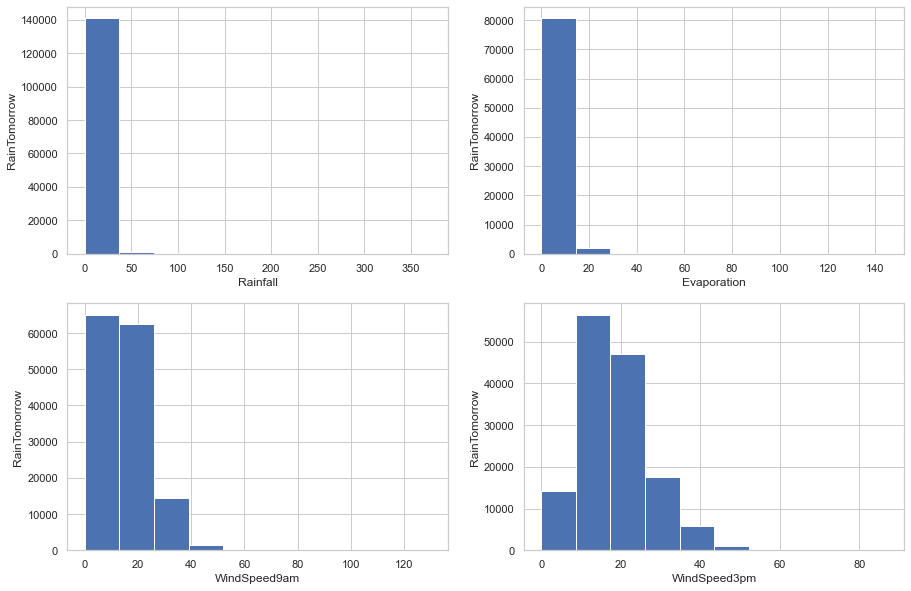

In [54]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

#### all the four variables are skewed.
#### use interquantile range to find outliers.

# INTER QUARTILE RANGE: TO REMOVE OUTLIERS
The interquartile range (IQR) measures the spread of the middle half of your data. It is the range for the middle 50% of your sample. 
A major outlier is defined as values that fall outside of 3 times IQR below Q1 or 3 times IQR above Q3.
#### Large outliers can heavily damage the accuracy of logistic and linear regression models.


In [55]:
# find outliers for Rainfall variable

Q3 = df.Rainfall.quantile(0.75) 
print("q3--->",Q3)
Q1 = df.Rainfall.quantile(0.25)
print("q1--->",Q1)
IQR = Q3-Q1
print(IQR)
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR
print("UPPER BOUND----->",upper_bound)
print("LOWER BOUND----->",lower_bound)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_bound, upperboundary=upper_bound))

q3---> 0.8
q1---> 0.0
0.8
UPPER BOUND-----> 3.2
LOWER BOUND-----> -2.4000000000000004
Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [56]:
# find outliers for Evaporation variable

Q3 = df.Evaporation.quantile(0.75) 
print("q3--->",Q3)
Q1 = df.Evaporation.quantile(0.25)
print("q1--->",Q1)
IQR = Q3-Q1
print(IQR)
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR
print("UPPER BOUND----->",upper_bound)
print("LOWER BOUND----->",lower_bound)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_bound, upperboundary=upper_bound))

q3---> 7.4
q1---> 2.6
4.800000000000001
UPPER BOUND-----> 21.800000000000004
LOWER BOUND-----> -11.800000000000002
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [57]:
# find outliers for WindSpeed9am variable

Q3 = df.WindSpeed9am.quantile(0.75) 
Q1 = df.WindSpeed9am.quantile(0.25)
IQR = Q3-Q1
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR
print("UPPER BOUND----->",upper_bound)
print("LOWER BOUND----->",lower_bound)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_bound, upperboundary=upper_bound))

UPPER BOUND-----> 55.0
LOWER BOUND-----> -29.0
WindSpeed9am outliers are values < -29.0 or > 55.0


In [58]:
# find outliers for WindSpeed3pm variable

Q3 = df.WindSpeed3pm.quantile(0.75) 
Q1 = df.WindSpeed3pm.quantile(0.25)
IQR = Q3-Q1
upper_bound = Q3 + 3 * IQR
lower_bound = Q1 - 3 * IQR
print("UPPER BOUND----->",upper_bound)
print("LOWER BOUND----->",lower_bound)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_bound, upperboundary=upper_bound))

UPPER BOUND-----> 57.0
LOWER BOUND-----> -20.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [59]:
df.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
Rainfall         142199
RainToday        142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
dtype: int64

# Declare feature vector and target variable


In [60]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

# Split data into separate training and test set

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
X_train.shape, X_test.shape

((116368, 21), (29092, 21))

# Feature Engineering
#### Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
##### displaying  the categorical and numerical variables again separately.

In [63]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [64]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [65]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [66]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
dtype: int64

In [67]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
dtype: int64

In [68]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


# Assumption
#### I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

#### I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [69]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)    

C:\Users\suman\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [71]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Engineering missing values in categorical variables

In [72]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()


Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [73]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [74]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [75]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [77]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [78]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [79]:
# impute missing values in y_train and y_test with respective column median in X_train
if y_train.isnull().mean()>0:
    print(y_train.isnull().mean())

0.02254056097896329


In [80]:
y_train.isnull().sum()

2623

In [81]:
y_train.fillna(y_train.mode()[0],inplace=True)

In [82]:
#checking
y_train.isnull().sum()

0

In [83]:
# for y_test  
y_test.isnull().sum()

644

In [84]:
y_test.fillna(y_test.mode()[0],inplace=True)

In [85]:
#checking
y_test.isnull().sum()

0

# Engineering outliers in numerical variables
#### We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers.
#### use top-coding approach to cap maximum values and remove outliers from the above variables.

In [86]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

<ipython-input-86-72f85cf95647>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
<ipython-input-86-72f85cf95647>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
<ipython-input-86-72f85cf95647>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [87]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [88]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [89]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [90]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [91]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000


# Encode categorical variables

In [92]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [93]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [94]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [95]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,0,1
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,0,1
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,1,0
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,0,1
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,1,0


#### We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

#### create the X_train training set.

In [96]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [97]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [99]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0,0,0,0,0,0,0,0,0,0


# FEATURE SCALING
#### now have training and testing set ready for model building. 
#### Before that, we should map all the feature variables onto the same scale. It is called feature scaling. 

In [100]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
cols = X_train.columns

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [104]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [105]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL TRAINING

In [106]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Predict results

In [107]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

# predict_proba method
### predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

### 0 is for probability of no rain and 1 is for probability of rain.

In [108]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.8427161 , 0.7418817 , 0.79339271, ..., 0.42386861, 0.65857897,
       0.96881804])

In [109]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.1572839 , 0.2581183 , 0.20660729, ..., 0.57613139, 0.34142103,
       0.03118196])

# Check accuracy score

In [110]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8488


In [111]:
y_test.value_counts()

No     22726
Yes     6366
Name: RainTomorrow, dtype: int64

In [112]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21552  1174]
 [ 3225  3141]]

True Positives(TP) =  21552

True Negatives(TN) =  3141

False Positives(FP) =  1174

False Negatives(FN) =  3225


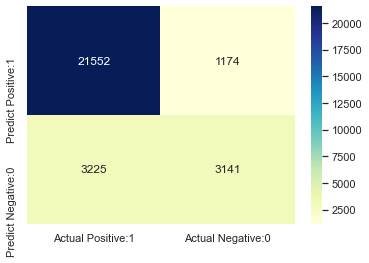

In [113]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Check for overfitting and underfitting

In [114]:

# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8487
Test set score: 0.8488


### The accuracy Score of training and testing data is comparable and almost equal. So, there is no question of underfitting and overfitting.
### And the model is generalizing well for new unseen data.